# Vinicius Freitas Schiavinato Olzon
# Algoritmo de Karger
### - Utilizado para encontrar o corte mínimo de um grafo

https://www.dropbox.com/sh/b9vcwq0u3rj516o/AAAlvn2_ONQ7srmq5s2KaVwla?dl=0

In [5]:
# 20
# 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0
# 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1
# 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
# 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1
# 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0
# 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1
# 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0
# 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1
# 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
# 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1
# 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
# 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1
# 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
# 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1
# 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0
# 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1
# 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0
# 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1
# 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0
# 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0


In [6]:
# 5
# 1 3 5 7 9 11 13 15 17 19
# 2 4 6 8 10 12 14 16 18 20


In [7]:
import random
import matplotlib.pyplot as plt

class Grafo:
  def __init__(self):
    self.cortes = []
    self.vertices = {}
    self.arestas = []

    self.matrizAdj = []
    self.listaAdj = []

  ####################################################

  def read(self, txt_file):
    # abre e lê a instância do grafo
    with open(txt_file) as f:
      lines = f.read()
      lines = lines.split('\n')
    self.num_vertices = int(lines[0])
    lines.pop()
    lines.pop(0)

    # cria a matriz e lista de adjacência
    self.matrizAdj = []
    self.listaAdj = []
    i = 1
    for line in range(self.num_vertices):
      row = []
      adjacent = [i]
      j = 1
      for vertice in lines[line].split(' '):
        if vertice != '':
          row.append(int(vertice))
          if int(vertice) == 1:
            adjacent.append(int(j))
          j+=1
      self.matrizAdj.append(row)
      self.listaAdj.append(adjacent)
      i+=1

    # pega os vértices e arestas do grafo
    n_vertices = self.get_numVertices()
    for i in range(n_vertices):
      self.vertices[i+1] = [i+1]

    self.arestas = []
    aresta = []
    for i in range(n_vertices):
      for j in range(i + 1, n_vertices):
        if self.matrizAdj[i][j]:
          aresta = [i+1,j+1]
          self.arestas.append(aresta)

  ####################################################

  def info(self):
    n_vertices = len(self.get_matrizAdj())
    for i in range(n_vertices):
      for j in range(n_vertices):
        print(self.matrizAdj[i][j], end = ' ')
      print()

  def get_matrizAdj(self):
    return self.matrizAdj

  def get_listaAdj(self):
    return self.listaAdj

  def get_numVertices(self):
    return self.num_vertices

  def getVertices(self):
    return self.vertices

  def getArestas(self):
    return self.arestas

  def guardaCorte(self, corte):
    self.cortes.append(corte)


  def juntaVertices(self, vertices, escolhidos, novo_vertice):
    # salva os vértices que serão unidos
    vertices_copia1 = vertices[escolhidos[0]] # lista com os vértices que aquele vértice1 representa
    vertices_copia2 = vertices[escolhidos[1]] # lista com os vértices que aquele vértice2 representa

    # retira os vértices escolhidos do dicionário e coloca o novo nó (a união desses dois)
    vertices.pop(escolhidos[0])
    vertices.pop(escolhidos[1])

    # cria um supervértice, a união dos dois vértices escolhidos
    vertices[novo_vertice] = []

    # adiciona os vértices do primeiro no super nó
    for i in range(len(vertices_copia1)):
      vertices[novo_vertice].append(vertices_copia1[i])

    # adiciona os vértices do segundo no super nó
    for i in range(len(vertices_copia2)):
      vertices[novo_vertice].append(vertices_copia2[i])


  def atualizaArestas(self, arestas, escolhidos, novo_vertice):
    while escolhidos in arestas:
      arestas.remove(escolhidos)

    for i in range(len(arestas)):
      if escolhidos[0] in arestas[i]:
        arestas[i] = [novo_vertice if vertice == escolhidos[0] else vertice for vertice in arestas[i]]
        arestas[i].sort()
      elif escolhidos[1] in arestas[i]:
        arestas[i] = [novo_vertice if vertice == escolhidos[1] else vertice for vertice in arestas[i]]
        arestas[i].sort()

    return arestas

  def arestasOriginais(self, vertices):
    S = list(vertices.keys())[0]
    S = vertices[S]
    S_ = list(vertices.keys())[-1]
    S_ = vertices[S_]

    # se existir uma aresta entre qualquer vértice de S e S_
    # ela vai para o conjunto de corte
    corte = []
    for i in S:
      for j in S_:
        possivel_aresta = sorted([i,j])
        if possivel_aresta in self.arestas:
          corte.append(possivel_aresta)

    return corte


  def AbordagemIngenua(self, n_iter):
    tamanho = random.randint(1, self.get_numVertices() -1)
    S_ = self.get_numVertices() - tamanho

    vertices = list(self.getVertices().keys())

    S = []
    for i in range(tamanho):
      v_aux = random.choice(vertices)
      S.append(v_aux)
      vertices.remove(v_aux)

    S_ = vertices

    min_cut = 0
    for i in S:
      edges = set(self.listaAdj[i-1]).intersection(set(S_))
      min_cut += len(edges)

    return min_cut


  def Karger(self, n_iter):
    for i in range(n_iter):
      vertices = self.getVertices().copy()
      arestas = self.getArestas().copy()

      # ao final do while vai sobrar 2 vértices só
      j = self.num_vertices
      while len(vertices) > 2:
        j+=1
        # escolhe uma aresta aleatória pra juntar em um só vértice
        aresta = sorted(random.choice(arestas))
        self.juntaVertices(vertices, aresta, j) # escolhidos vai ser uma lista
        # atualiza as arestas após a junção dos dois vértices escolhidos
        arestas = self.atualizaArestas(arestas, aresta, j)

      # guarda o corte resultante do grafo. O corte é um conjunto de arestas
      # restantes ao final das junções das arestas
      corte = len(self.arestasOriginais(vertices))
      self.guardaCorte(corte)

    min_cut = min(self.cortes)

    self.cortes = []

    return min_cut



O corte minimo dessa instancia tem tamanho 5

Com n_iter = 5 a probabilidade da Ingenua acertar é = 0.0
Com n_iter = 5 a probabilidade de Karger acertar é = 0.45

Com n_iter = 15 a probabilidade da Ingenua acertar é = 0.0
Com n_iter = 15 a probabilidade de Karger acertar é = 0.81

Com n_iter = 25 a probabilidade da Ingenua acertar é = 0.0
Com n_iter = 25 a probabilidade de Karger acertar é = 0.93

Com n_iter = 35 a probabilidade da Ingenua acertar é = 0.0
Com n_iter = 35 a probabilidade de Karger acertar é = 0.91

Com n_iter = 45 a probabilidade da Ingenua acertar é = 0.0
Com n_iter = 45 a probabilidade de Karger acertar é = 0.99



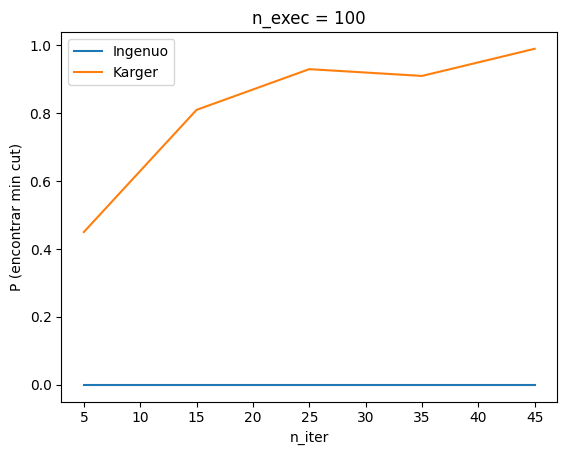

In [8]:
grafo = Grafo()
grafo.read('graph.txt')
# print(f'vertices = {grafo.vertices}')
# print(f'arestas = {grafo.arestas}\n')

f = open('graph_output.txt', "r")
otimo = int(f.readline())
print(f"\nO corte minimo dessa instancia tem tamanho {otimo}\n")

n_iter = 5
n_exec = 100
acertos_I = 0
acertos_K = 0
prob_ingenua = []
prob_karger = []
n_iter_list = []
passo = 10

while True:

  for i in range(n_exec):
    tamanho_min_I = grafo.AbordagemIngenua(n_iter)
    tamanho_min_K = grafo.Karger(n_iter)

    if tamanho_min_I == otimo:
      acertos_I +=1

    if tamanho_min_K == otimo:
      acertos_K +=1

  # print(f"\nDe {n_exec} execuções, a abordagem ingenua acertou {acertos_I} vezes.")
  # print(f"\nDe {n_exec} execuções, o algoritmo de Karger acertou {acertos_K} vezes.")
  print(f'Com n_iter = {n_iter} a probabilidade da Ingenua acertar é = {acertos_I / n_exec}')
  print(f'Com n_iter = {n_iter} a probabilidade de Karger acertar é = {acertos_K / n_exec}')
  print()

  # Para plotar o gŕafico precisamos de n_iter e da prob da abordagem ingenua e do algoritmo de karger
  prob_ingenua.append(acertos_I / n_exec)
  prob_karger.append(acertos_K / n_exec)
  n_iter_list.append(n_iter)

  if (acertos_K / n_exec) > 0.95:
    break

  acertos_I = 0
  acertos_K = 0

  n_iter+=passo

# Plot do gráfico da probabilidade de ambas abordagens
plt.plot()
plt.plot(n_iter_list, prob_ingenua, label = "Ingenuo")
plt.plot(n_iter_list, prob_karger, label = "Karger")
plt.title("n_exec = 100")
plt.xlabel("n_iter")
plt.ylabel("P (encontrar min cut)")
plt.legend()
plt.show()
